# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [37]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv('dataset/training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [38]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [39]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='categoria', ylabel='count'>

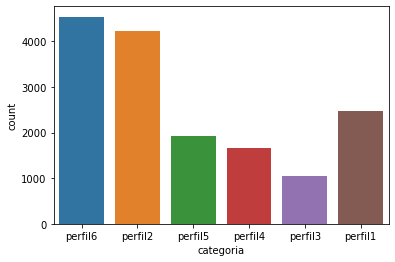

In [40]:
fig = plt.plot()
sns.countplot(x='categoria', data=df_training_dataset)

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [41]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [42]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [43]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,0,10.0,0.0,0.0,0.0,perfil6
15853,229931283.0,Bacharelado,0,Advogado,0,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,0.0,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [44]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(
    columns=['id', 'universidade', 'organizacao'] , 
    inplace=False
)

In [45]:
df_training_dataset_rmcolumns.tail()

,graduacao,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,Bacharelado,Outros,0.0,0.0,1.0,8.0,0,10.0,0.0,0.0,0.0,perfil6
15853,Bacharelado,Advogado,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,0.0,perfil5
15854,Tecnólogo,Sócio/Dono/Proprietário,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,SEM FORMAÇÃO,Advogado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
15856,0,0,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [46]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao','graduacao', 'como_conheceu_lit'])
df_training.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_0,...,como_conheceu_lit_0,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube
15852,0.0,0.0,1.0,8.0,10.0,0.0,0.0,0.0,perfil6,0,...,1,0,0,0,0,0,0,0,0,0
15853,0.0,0.0,1.0,7.0,42.0,17.0,15.0,0.0,perfil5,0,...,0,0,0,0,1,0,0,0,0,0
15854,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5,0,...,0,0,0,0,0,0,0,1,0,0
15855,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1,0,...,1,0,0,0,0,0,0,0,0,0
15856,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1,1,...,0,0,0,0,0,0,0,1,0,0


# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

In [47]:
from imblearn.over_sampling import SMOTE

# instância o SMOTE
smt = SMOTE(random_state = 42)

df_training_cpy = df_training.copy()

# aplica o SMOTE nos dados
X, y = smt.fit_sample(
    X = df_training_cpy.drop("categoria", axis = 1),
    y= np.array(df_training_cpy["categoria"])
)

# reconstrução de um novo DataFrame
X["categoria"] = y
df_training_smt = X;

<AxesSubplot:xlabel='categoria', ylabel='count'>

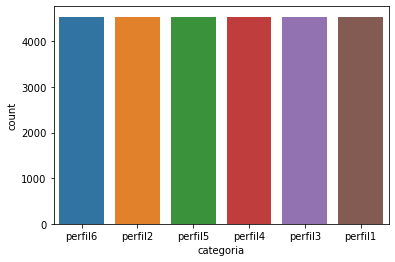

In [48]:
fig = plt.plot()
sns.countplot(x = df_training_smt["categoria"])

In [49]:
df_training_smt.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_0,profissao_Advogado,...,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube,categoria
27229,0.0,0.0,1.000000,2.477823,10.000000,9.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,perfil5
27230,1.0,1.0,0.696561,9.303439,26.696561,8.000000,6.303439,0.0,0,0,...,0,0,0,0,0,0,0,0,0,perfil5
27231,0.0,0.0,1.000000,9.848146,19.924073,7.075927,5.924073,0.0,0,0,...,0,0,0,0,0,0,0,0,0,perfil5
27232,0.0,0.0,0.179676,4.101620,57.460972,12.078055,0.000000,0.0,0,0,...,0,0,0,0,0,1,0,0,0,perfil5
27233,0.0,0.0,1.000000,3.561864,27.000000,3.685591,1.561864,0.0,0,0,...,0,0,0,0,0,0,0,0,0,perfil5


## Treinando um classificador com base em Extreme Gradient Boosting (xgBoost)

### Selecionando FEATURES e definindo a variável TARGET

In [50]:
df_training_smt.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário',
       'graduacao_0', 'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo', 'como_conheceu_lit_0',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)

In [51]:
features = df_training_smt[
    ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário',
       'graduacao_0', 'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo', 'como_conheceu_lit_0',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube'
    ]
]
target = df_training_smt['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=133)

### Treinando uma árvore de decisão

In [53]:
# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)

### Treinando um xg_boost

In [54]:
# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Criação de um eXtreme Gradient Boosting com a biblioteca ``scikit-learn``:
xtreme_bst = xgb.XGBClassifier(
 learning_rate =0.9,
 n_estimators= 100,
 max_depth= 10,
 gamma=0,
 objective= 'binary:logistic',
 min_child_weight = 6,
 random_state= 42
)

In [55]:
# Treino do modelo (é chamado o método *fit()* com os conjuntos de treino)
xtreme_bst.fit(
    X_train,
    y_train.array
)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Fazendo previsões na amostra de teste

In [56]:
y_pred_dtc = dtc.predict(X_test)
print(y_pred_dtc)

['perfil4' 'perfil2' 'perfil6' ... 'perfil2' 'perfil2' 'perfil3']


In [57]:
y_pred_xgb = xtreme_bst.predict(X_test)
print(y_pred_xgb)

['perfil4' 'perfil2' 'perfil6' ... 'perfil2' 'perfil2' 'perfil3']


### Analisando a qualidade do modelo através da matriz de confusão

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Confusion Matrix for Decision Tree Classifier


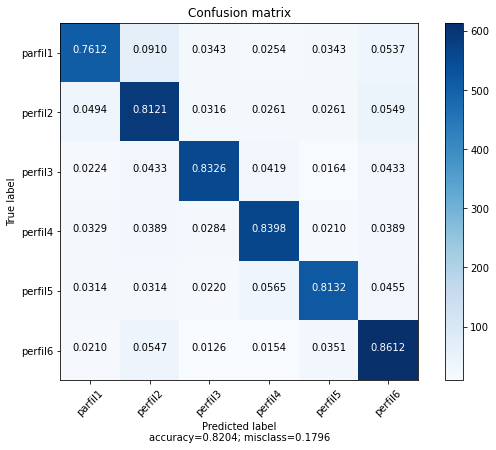




Confusion Matrix for xg_boost Classifier


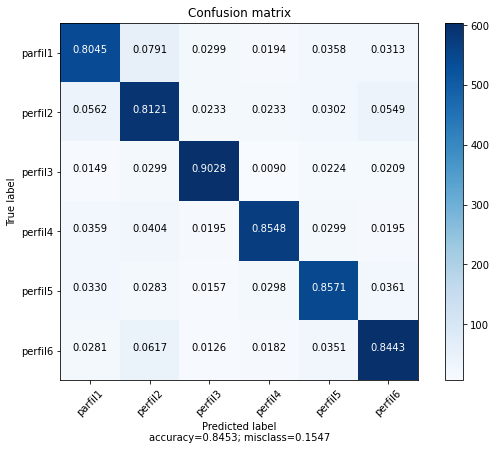

In [59]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix for Decision Tree Classifier')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dtc), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])
print('\n\n')
print('Confusion Matrix for xg_boost Classifier')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_xgb), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [60]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv('dataset/to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [61]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [62]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
#df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored
    ),
    columns=df_to_be_scored.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id', 'universidade', 'organizacao'], inplace=False)

# 4 - Encoding com "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao','graduacao', 'como_conheceu_lit'])

df_to_be_scored_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   pretende_fazer_cursos_lit                            1000 non-null   int64
 1   interesse_mba_lit                                    1000 non-null   int64
 2   importante_ter_certificado                           1000 non-null   int64
 3   horas_semanais_estudo                                1000 non-null   int64
 4   total_modulos                                        1000 non-null   int64
 5   modulos_iniciados                                    1000 non-null   int64
 6   modulos_finalizados                                  1000 non-null   int64
 7   certificados                                         1000 non-null   int64
 8   profissao_Advogado                                   1000 non-null   uint8
 9   profissao

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [63]:
df_training_smt[
    ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário',
       'graduacao_0', 'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo', 'como_conheceu_lit_0',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube'
    ]
].columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário',
       'graduacao_0', 'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo', 'como_conheceu_lit_0',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)

In [64]:
df_to_be_scored_4.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário', 'graduacao_Bacharelado',
       'graduacao_Especialização', 'graduacao_Licenciatura', 'graduacao_MBA',
       'graduacao_SEM FORMAÇÃO', 'graduacao_Tecnólogo',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Sai

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [65]:
df_to_be_scored_4['profissao_0'] = 0
df_to_be_scored_4['graduacao_0'] = 0
df_to_be_scored_4['como_conheceu_lit_0'] = 0

In [67]:
df_to_be_scored_4 = df_to_be_scored_4[
    ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário',
       'graduacao_0', 'graduacao_Bacharelado', 'graduacao_Especialização',
       'graduacao_Licenciatura', 'graduacao_MBA', 'graduacao_SEM FORMAÇÃO',
       'graduacao_Tecnólogo', 'como_conheceu_lit_0',
       'como_conheceu_lit_Facebook', 'como_conheceu_lit_Google',
       'como_conheceu_lit_Instagram', 'como_conheceu_lit_Linkedin',
       'como_conheceu_lit_Minha empresa - benefício LITpass',
       'como_conheceu_lit_Mídia (revista/jornal/web)',
       'como_conheceu_lit_Outros', 'como_conheceu_lit_Saint Paul',
       'como_conheceu_lit_YouTube'
    ]
]

In [68]:
y_pred = xtreme_bst.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_0,profissao_Advogado,...,como_conheceu_lit_Facebook,como_conheceu_lit_Google,como_conheceu_lit_Instagram,como_conheceu_lit_Linkedin,como_conheceu_lit_Minha empresa - benefício LITpass,como_conheceu_lit_Mídia (revista/jornal/web),como_conheceu_lit_Outros,como_conheceu_lit_Saint Paul,como_conheceu_lit_YouTube,target
995,0,0,1,2,245,63,45,1,0,0,...,0,0,0,0,0,0,0,0,1,perfil1
996,1,1,1,8,163,111,96,0,0,0,...,0,1,0,0,0,0,0,0,0,perfil2
997,1,1,1,9,56,10,4,0,0,0,...,1,0,0,0,0,0,0,0,0,perfil6
998,1,1,1,9,138,60,30,0,0,0,...,0,0,0,0,0,1,0,0,0,perfil2
999,0,0,1,9,22,20,19,0,0,1,...,0,0,0,0,0,1,0,0,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [71]:
df_to_be_scored_4.to_csv("results.csv", index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
